In [1]:
import sys

sys.path.append('./utils/')
import numpy as np
import cv2
import gdal
import loadcoraldata_utils as coralutils
import scipy
import os
from matplotlib import pyplot as plt

%matplotlib notebook

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
# Test export of patches from map

transect1_path = '../Images/Transect 1 Hi-Resx2.png'
transect1_hirespath = '../Images/Transect 1 Hi-Res.tiff'
transect1_truth_path = '../Images/Transect 1 Truth data.tif'
output_trainpath = '../Images/Training_Patchesx2/'
output_trainrefpath = '../Images/TrainingRef_Patchesx2/'
output_trainfilename = 'NeMO_train.txt'
output_validpath = '../Images/Valid_Patchesx2/'
output_validrefpath = '../Images/ValidRef_Patchesx2/'
output_validfilename = 'NeMO_valid.txt'

if not os.path.exists(output_trainpath):
    os.makedirs(output_trainpath)
if not os.path.exists(output_trainrefpath):
    os.makedirs(output_trainrefpath)
if not os.path.exists(output_validpath):
    os.makedirs(output_validpath)
if not os.path.exists(output_validrefpath):
    os.makedirs(output_validrefpath)

# tempimage = cv2.imread(transect1_hirespath, cv2.IMREAD_UNCHANGED)
# tempimage = tempimage[:,:,:-1]
# tempimage_resize = scipy.misc.imresize(tempimage,0.5)
# cv2.imwrite('../Images/Transect 1 Hi-Resx2.png', tempimage_resize)
# cv2.imwrite('../Images/Transect 1 Hi-Res.png', tempimage)

image_size = 64
#labels = ('Sand', 'Branching', 'Mounding', 'Rock')
labels_dict = {'Sand': 0, 'Branching': 1, 'Mounding': 2, 'Rock':3}
Transect1 = coralutils.CoralData(transect1_path, Truthpath=transect1_truth_path, truth_key=[16,160,198,38], load_type="cv2")
Transect1.class_labels = list(labels_dict)
Transect1.class_dict = labels_dict

print(Transect1.image.shape)
print(Transect1.truthimage.shape)
print(Transect1.class_dict)

# fig = plt.figure(1)
# plt.imshow(cv2.cvtColor(tempimage_resize, cv2.COLOR_BGR2RGB))
# plt.show()

(6799, 1502, 3)
(13598, 3005)
{'Sand': 0, 'Branching': 1, 'Mounding': 2, 'Rock': 3}


In [8]:
print("Outputing Training...")
Transect1.export_segmentation_map(output_trainpath, output_trainrefpath, output_trainfilename, image_size = image_size, magnification=2,
                                  magimg_path=transect1_hirespath, N = 2000, lastchannelremove = False, labelkey = labels_dict, subdir=True)
print("\n")
print("Outputing Validation...")
Transect1.export_segmentation_map(output_validpath, output_validrefpath, output_validfilename, image_size = image_size, magnification=2,
                                  magimg_path=transect1_hirespath, N = 100, lastchannelremove = False, labelkey = labels_dict, subdir=True)

Outputing Training...
4 of 4 total classes found and saved


Outputing Validation...
4 of 4 total classes found and saved


<IPython.core.display.Javascript object>


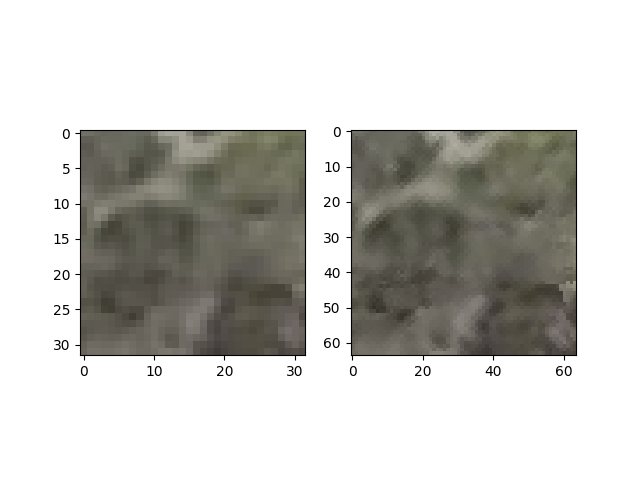

In [11]:
lores_filename = '../Images/Training_Patchesx2/Mounding/Mounding_00000001.png'
hires_filename = '../Images/TrainingRef_Patchesx2/Mounding/Mounding_00000001.png'

lores_img = cv2.imread(lores_filename)
hires_img = cv2.imread(hires_filename)

fig = plt.figure(2)
ax1 = fig.add_subplot(121)
ax1.imshow(cv2.cvtColor(lores_img, cv2.COLOR_BGR2RGB))
ax2 = fig.add_subplot(122)
ax2.imshow(cv2.cvtColor(hires_img, cv2.COLOR_BGR2RGB))
plt.show()



In [5]:
# Test export of patches from gdal
imgpath = '../Images/BTPB-WV2-2012-15-8Band-mosaic-GeoTiff-Sample-AOI/BTPB-WV2-2012-15-8Band-mosaic-GeoTiff-Sample-AOI.tif'
tfwpath = '../Images/BTPB-WV2-2012-15-8Band-mosaic-GeoTiff-Sample-AOI/BTPB-WV2-2012-15-8Band-mosaic-GeoTiff-Sample-AOI.tfw'
truthpath = '../Images/BIOT-PerosBanhos-sample-habitat-map/BIOT-PerosBanhos-sample-habitat-map.shp'
output_trainpath = '../Images/LO_Training_Patches_256/'
output_trainrefpath = '../Images/LO_TrainingRef_Patches_256/'
output_trainfilename = 'rastertrain.txt'
output_validpath = '../Images/LO_Valid_Patches_256/'
output_validrefpath = '../Images/LO_ValidRef_Patches_256/'
output_validfilename = 'rastervalid.txt'

PerosBanhos = coralutils.CoralData(imgpath, Truthpath=truthpath, load_type="raster", tfwpath=tfwpath)
print("Outputing Training...")
PerosBanhos.export_segmentation_map(output_trainpath, output_trainrefpath, 
                                    output_trainfilename, image_size=256, N=2000, lastchannelremove=False, 
                                    labelkey = PerosBanhos.class_labels, subdir=True)
print("\n")
print("Outputing Validation...")
PerosBanhos.export_segmentation_map(output_validpath, output_validrefpath, 
                                    output_validfilename, image_size=256, N=200, lastchannelremove=False, 
                                    labelkey = PerosBanhos.class_labels, subdir=True)



Outputing Validation...


In [3]:
print(PerosBanhos.class_labels)
print(PerosBanhos.num_classes)
print(PerosBanhos.image.shape)
print(PerosBanhos.truthimage.shape)

['NoData', 'back reef - pavement', 'back reef - rubble dominated', 'back reef - sediment dominated', 'back reef coral framework', 'Beach', 'Clouds', 'coralline algal ridge (reef crest)', 'deep fore reef slope', 'deep lagoonal water', 'deep ocean water', 'dense seagrass meadows', 'fore reef sand flats', 'Inland waters', 'lagoonal floor - barren', 'lagoonal fringing reefs', 'lagoonal patch reefs', 'lagoonal sediment apron - sediment dominated', 'mangroves', 'Rocky beach', 'shallow fore reef slope', 'shallow fore reef terrace', 'terrestrial vegetation', 'Wetlands']
24
(3272, 4330, 8)
(3272, 4330)


In [4]:
# Test import
testpath = '/home/shared/NeMO-Net Data/cloudImages4training/CloudMask_TrainingRef_Patches_4channel_256/Clouds/Clouds_00000001.tif'
img = cv2.imread(testpath)
print(np.unique(img))
# TestBanhos= coralutils.CoralData(testpath, load_type="raster")

# Perostest_RGB = np.rollaxis(np.asarray([1/1016*TestBanhos.image[:,:,4], 1/1543*TestBanhos.image[:,:,2], 1/945*TestBanhos.image[:,:,1]]),0,3)

# plt.figure(1)
# plt.imshow(Perostest_RGB)
# plt.show()
# print(TestBanhos.image)


[  0 127]
